# NBA Clusters

## Import Packages

In [440]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
from statsmodels.stats import weightstats
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import pickle

## Get Data (NBA.com)

In [15]:
# cleaning function
def clean_data(stats_list):
    """Prepares scraped data so that it can be put into a dataframe"""
    cleaned = []
    for i in stats_list:
        x = i.split('\n')
        y = x[1].split(" ")
        empty = [x[0]]
        for j in range(len(y)):
            empty.append(y[j])
        cleaned.append(empty)
    return cleaned

def clean_cols(columns_list):
    """removes '\n' from column names so they can easily be worked with"""
    cols_fixed = []
    for i in columns_list:
        x = i.replace('\n',' ')
        cols_fixed.append(x)
    return cols_fixed[:-1]

def make_df(cols, data):
    """Creates a dataframe given columns and data in the form of a 
    list of lists"""
    df = pd.DataFrame(data, columns = cols)
    return df

In [53]:
driver = webdriver.Chrome("/Users/KevinSun/flatiron/final_project/chromedriver")

,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,EFG%
0,Aaron Brooks,MIN,32,5.9,0.8,0.3,0.5,53.3,0.3,0.4,57.1,80.0
1,Aaron Gordon,ORL,58,32.9,5.0,1.7,4.6,37.7,1.5,3.9,39.2,54.5
2,Aaron Harrison,DAL,9,25.9,2.7,0.9,4.1,21.6,0.9,4.1,21.6,32.4
3,Aaron Jackson,HOU,1,34.5,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
4,Abdel Nader,BOS,48,10.9,1.4,0.5,1.4,35.4,0.5,1.3,34.9,52.3
5,Adreian Payne,ORL,5,8.5,1.6,0.6,1.0,60.0,0.4,0.6,66.7,80.0
6,Al Horford,BOS,72,31.6,4.3,1.6,3.7,43.7,1.2,2.7,42.1,59.5
7,Al Jefferson,IND,36,13.4,1.1,0.6,1.4,39.2,0.0,0.1,0.0,39.2
8,Al-Farouq Aminu,POR,69,30.0,5.1,1.7,4.7,36.6,1.7,4.5,37.2,54.7
9,Alan Williams,PHX,5,14.1,0.0,0.0,0.6,0.0,-,-,-,0.0


In [564]:
#18
driver.get('https://stats.nba.com/players/hustle/?Season=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
hustle_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')

In [565]:
stats_list_hustle18 = []
for i in range(530):
    stats_list_hustle18.append(hustle_stats18[i].text)

hustle_18 = clean_data(stats_list_hustle18)

columns_hustle = driver.find_elements_by_tag_name('th')
cols_hustle = []
for i in range(len(columns_hustle)):
    cols_hustle.append(columns_hustle[i].text)
cols_hustle = clean_cols(cols_hustle)

df_hustle18 = make_df(cols_hustle,hustle_18)
df_hustle18.head()


,PLAYER,TEAM,AGE,GP,MIN,SCREEN ASSISTS,SCREEN ASSISTS PTS,DEFLECTIONS,OFF LOOSE BALLS RECOVERED,DEF LOOSE BALLS RECOVERED,LOOSE BALLS RECOVERED,% LOOSE BALLS RECOVERED OFF,% LOOSE BALLS RECOVERED DEF,CHARGES DRAWN,CONTESTED 2PT SHOTS,CONTESTED 3PT SHOTS,CONTESTED SHOTS
0,Aaron Gordon,ORL,23,78,33.8,0.9,2.1,1.3,0.6,0.6,1.2,50.5,49.5,0.01,4.4,2.1,6.5
1,Aaron Holiday,IND,22,50,12.9,0.0,0.0,0.7,0.2,0.2,0.3,47.1,52.9,0.00,1.5,1.0,2.5
2,Abdel Nader,OKC,25,61,11.4,0.0,0.1,0.5,0.2,0.2,0.4,52.0,48.0,0.02,2.1,1.6,3.8
3,Al Horford,BOS,33,68,29.0,3.3,7.7,1.4,0.3,0.6,0.8,31.6,68.4,0.00,8.8,2.9,11.7
4,Al-Farouq Aminu,POR,28,81,28.3,1.0,2.3,1.9,0.5,0.5,1.0,53.8,46.3,0.02,4.4,3.0,7.4


In [56]:
driver.get('https://stats.nba.com/players/playtype-post-up/?SeasonYear=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
post_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')

stats_list_post18 = []
for i in range(195):
    stats_list_post18.append(post_stats18[i].text)

post18 = clean_data(stats_list_post18)

columns_post = driver.find_elements_by_tag_name('th')
cols_post = []
for i in range(len(columns_post)):
    cols_post.append(columns_post[i].text)
cols_post = clean_cols(cols_post)

df_post18 = make_df(cols_post,post18)
df_post18

,PLAYER,TEAM,GP,POSS,FREQ,PPP,PTS,FGM,FGA,FG%,EFG%,FT FREQ,TOV FREQ,SF FREQ,AND ONE FREQ,SCORE FREQ,PERCENTILE
0,LaMarcus Aldridge,SAS,81,8.6,42.7%,1.04,9.0,3.4,7.0,50.6%,50.6%,15.7%,7.3%,13.3%,3.7%,52.4%,76.5
1,Joel Embiid,PHI,64,8.1,29.9%,1.05,8.5,2.6,5.2,50.1%,50.1%,26.6%,13.1%,20.7%,4.4%,53.7%,78.4
2,Karl-Anthony Towns,MIN,77,6.8,30.2%,1.02,7.0,2.3,5.0,54.1%,54.1%,15.4%,15.2%,12.7%,3.8%,51.0%,73.5
3,Blake Griffin,DET,75,6.4,26.4%,0.92,5.9,2.3,4.4,48.6%,48.6%,19.9%,14.9%,15.9%,3.7%,48.2%,49.5
4,Nikola Jokic,DEN,80,5.1,25.4%,1.03,5.2,1.9,3.9,52.4%,52.4%,15.2%,11.3%,12.0%,2.9%,52.1%,75.5
5,Nikola Vucevic,ORL,80,5.4,26.9%,0.93,5.0,2.2,4.4,49.4%,49.4%,8.3%,11.5%,4.6%,1.6%,46.8%,50.0
6,Deandre Ayton,PHX,71,4.3,28.5%,1.03,4.5,1.6,3.5,54.6%,54.6%,10.1%,10.1%,8.8%,2.0%,52.1%,75.0
7,Steven Adams,OKC,79,3.5,25.6%,0.96,3.3,1.2,2.6,54.6%,54.6%,16.4%,10.2%,10.9%,1.5%,50.7%,59.8
8,Anthony Davis,NOP,56,4.3,18.3%,0.97,4.2,1.9,3.3,43.2%,43.2%,21.4%,5.8%,18.1%,2.5%,50.6%,61.8
9,Robin Lopez,CHI,74,3.0,32.2%,1.03,3.1,1.0,2.4,58.3%,58.3%,7.2%,13.1%,6.8%,1.8%,52.0%,74.5


In [57]:
driver.get('https://stats.nba.com/players/cut/?SeasonYear=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
cut_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')


In [58]:
stats_list_cut18 = []
for i in range(360):
    stats_list_cut18.append(cut_stats18[i].text)

cut18 = clean_data(stats_list_cut18)

columns_cut = driver.find_elements_by_tag_name('th')
cols_cut = []
for i in range(len(columns_cut)):
    cols_cut.append(columns_cut[i].text)
cols_cut = clean_cols(cols_cut)

df_cut18 = make_df(cols_cut,cut18)
df_cut18

,PLAYER,TEAM,GP,POSS,FREQ,PPP,PTS,FGM,FGA,FG%,EFG%,FT FREQ,TOV FREQ,SF FREQ,AND ONE FREQ,SCORE FREQ,PERCENTILE
0,Rudy Gobert,UTA,81,3.5,26.4%,1.29,4.5,0.8,2.6,69.2%,69.2%,22.9%,6.0%,23.2%,4.6%,68.3%,52.3
1,Clint Capela,HOU,67,4.0,28.3%,1.35,5.3,1.1,3.5,69.5%,69.5%,11.7%,1.9%,11.7%,3.0%,68.7%,64.6
2,JaVale McGee,LAL,75,2.9,26.5%,1.38,4.0,0.7,2.5,71.4%,71.4%,13.0%,5.1%,12.5%,3.7%,69.4%,72.7
3,Montrezl Harrell,LAC,82,2.5,17.2%,1.42,3.5,0.6,2.0,71.9%,71.9%,23.4%,4.9%,23.4%,9.8%,69.8%,76.7
4,Ben Simmons,PHI,79,2.7,15.1%,1.30,3.5,0.7,2.3,68.9%,68.9%,12.6%,6.5%,12.1%,2.8%,66.5%,53.9
5,Jarrett Allen,BKN,80,2.6,26.2%,1.32,3.4,0.7,2.0,67.5%,67.5%,20.6%,5.7%,20.6%,4.3%,67.9%,55.9
6,Dwight Powell,DAL,77,2.2,26.1%,1.54,3.4,0.4,1.8,78.5%,78.5%,26.2%,5.2%,26.2%,9.9%,76.7%,92.2
7,Derrick Favors,UTA,76,2.6,24.3%,1.32,3.4,0.6,2.1,69.4%,69.4%,17.3%,6.6%,17.3%,5.6%,66.3%,56.3
8,Andre Drummond,DET,79,2.8,15.6%,1.16,3.3,0.8,2.3,63.2%,63.2%,14.9%,7.2%,14.4%,4.1%,59.5%,28.2
9,Nikola Vucevic,ORL,80,2.4,11.7%,1.32,3.1,0.7,2.1,65.7%,65.7%,11.2%,3.2%,10.6%,4.3%,66.0%,57.9


In [60]:
driver.get('https://stats.nba.com/players/pullup/?Season=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
pullup_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')
stats_list_pullup18 = []
for i in range(530):
    stats_list_pullup18.append(pullup_stats18[i].text)

pullup_18 = clean_data(stats_list_pullup18)

columns_pullup = driver.find_elements_by_tag_name('th')
cols_pullup = []
for i in range(len(columns_pullup)):
    cols_pullup.append(columns_pullup[i].text)
cols_pullup = clean_cols(cols_pullup)

df_pullup18 = make_df(cols_pullup,pullup_18)
df_pullup18

,PLAYER,TEAM,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,EFG%
0,Aaron Gordon,ORL,78,40,38,33.8,2.8,1.2,3.4,36.2,0.4,1.2,32.3,41.9
1,Aaron Holiday,IND,50,31,19,12.9,2.1,0.9,2.6,33.8,0.4,1.2,29.5,40.8
2,Abdel Nader,OKC,61,38,23,11.4,0.2,0.1,0.2,30.8,0.0,0.1,40.0,38.5
3,Al Horford,BOS,68,41,27,29.0,0.6,0.3,0.7,45.8,0.0,0.0,-,45.8
4,Al-Farouq Aminu,POR,81,52,29,28.3,0.2,0.1,0.5,17.1,0.0,0.2,14.3,19.5
5,Alan Williams,BKN,5,1,4,5.1,0.0,0.0,0.0,-,0.0,0.0,-,-
6,Alec Burks,SAC,64,19,45,21.5,1.6,0.6,2.4,27.0,0.3,1.2,29.7,34.2
7,Alex Abrines,OKC,31,21,10,19.0,0.7,0.3,0.5,50.0,0.2,0.4,54.5,68.8
8,Alex Caruso,LAL,25,8,17,21.2,2.0,0.8,2.0,38.8,0.4,0.8,55.0,50.0
9,Alex Len,ATL,77,28,49,20.1,0.1,0.0,0.1,33.3,0.0,0.1,25.0,38.9


In [61]:
driver.get('https://stats.nba.com/players/touches/?Season=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
touches_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')
stats_list_touches18 = []
for i in range(530):
    stats_list_touches18.append(touches_stats18[i].text)

touches_18 = clean_data(stats_list_touches18)

columns_touches = driver.find_elements_by_tag_name('th')
cols_touches = []
for i in range(len(columns_touches)):
    cols_touches.append(columns_touches[i].text)
cols_touches = clean_cols(cols_touches)

df_touches18 = make_df(cols_touches,touches_18)
df_touches18

,PLAYER,TEAM,GP,W,L,MIN,PTS,TOUCHES,FRONT CT TOUCHES,TIME OF POSS,AVG SEC PER TOUCH,AVG DRIB PER TOUCH,PTS PER TOUCH,ELBOW TOUCHES,POST UPS,PAINT TOUCHES,PTS PER ELBOW TOUCH,PTS PER POST TOUCH,PTS PER PAINT TOUCH
0,Aaron Gordon,ORL,76,38,38,33.8,16.2,54.5,32.7,2.4,2.62,1.76,0.297,2.6,2.9,4.3,0.424,0.511,0.906
1,Aaron Holiday,IND,50,31,19,12.9,5.9,23.0,10.5,1.6,4.10,3.82,0.256,0.2,0.0,0.1,0.889,0.000,0.333
2,Abdel Nader,OKC,60,37,23,11.4,4.0,10.3,6.5,0.4,2.18,1.53,0.387,0.1,0.0,0.3,1.125,0.000,1.200
3,Al Horford,BOS,68,41,27,29.0,13.6,57.0,37.4,1.7,1.78,0.76,0.239,4.1,3.7,5.2,0.366,0.528,0.803
4,Al-Farouq Aminu,POR,81,52,29,28.3,9.4,36.0,16.9,1.1,1.91,0.92,0.261,1.1,0.3,2.4,0.398,0.286,0.822
5,Alan Williams,BKN,5,1,4,5.1,3.6,12.6,6.6,0.3,1.30,0.28,0.286,1.6,0.6,2.2,0.500,0.667,1.273
6,Alec Burks,SAC,64,19,45,21.5,8.8,35.7,21.4,1.9,3.21,2.56,0.246,0.3,0.3,0.8,0.333,0.667,1.135
7,Alex Abrines,OKC,31,21,10,19.0,5.3,16.5,12.4,0.5,1.89,1.12,0.322,0.3,0.0,0.1,0.500,0.000,0.000
8,Alex Caruso,LAL,25,8,17,21.2,9.2,40.7,16.1,2.6,3.85,3.23,0.225,0.7,0.0,1.3,0.500,0.000,0.576
9,Alex Len,ATL,77,28,49,20.1,11.1,36.9,24.0,0.8,1.37,0.37,0.301,2.4,1.2,6.5,0.432,0.833,0.950


In [64]:
driver.get('https://stats.nba.com/players/catch-shoot/?Season=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
catch_shoot_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')
stats_list_catch_shoot18 = []
for i in range(530):
    stats_list_catch_shoot18.append(catch_shoot_stats18[i].text)

catch_shoot18 = clean_data(stats_list_catch_shoot18)

columns_cs = driver.find_elements_by_tag_name('th')
cols_cs = []
for i in range(len(columns_cs)):
    cols_cs.append(columns_cs[i].text)
cols_cs = clean_cols(cols_cs)

df_catch_shoot18 = make_df(cols_cs,catch_shoot18)
df_catch_shoot18

,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,EFG%
0,Aaron Gordon,ORL,78,33.8,3.8,1.3,3.7,36.1,1.1,3.1,36.5,51.4
1,Aaron Holiday,IND,50,12.9,1.5,0.5,1.3,38.5,0.5,1.3,38.5,57.7
2,Abdel Nader,OKC,61,11.4,1.4,0.5,1.6,30.5,0.5,1.5,30.9,45.8
3,Al Horford,BOS,68,29.0,5.6,2.3,5.1,44.5,1.1,3.0,36.0,55.1
4,Al-Farouq Aminu,POR,81,28.3,3.5,1.2,3.4,35.5,1.1,3.2,35.8,52.6
5,Alan Williams,BKN,5,5.1,0.4,0.2,0.8,25.0,0.0,0.2,0.0,25.0
6,Alec Burks,SAC,64,21.5,1.9,0.7,1.6,42.2,0.6,1.5,40.9,60.8
7,Alex Abrines,OKC,31,19.0,3.6,1.2,3.9,31.4,1.1,3.7,30.2,45.9
8,Alex Caruso,LAL,25,21.2,1.6,0.5,1.2,43.3,0.5,1.1,46.4,65.0
9,Alex Len,ATL,77,20.1,3.0,1.0,2.8,36.1,0.9,2.6,37.1,52.7


In [65]:
df_catch_shoot18.columns
for i in df_catch_shoot18.columns:
    df_catch_shoot18[i] = df_catch_shoot18[i].mask(df_catch_shoot18[i]=="-","0")
    
for i in df_catch_shoot18.columns:
    if i != "PLAYER" and i != "TEAM":
        df_catch_shoot18[i] = pd.to_numeric(df_catch_shoot18[i])

df_catch_shoot18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 12 columns):
PLAYER    530 non-null object
TEAM      530 non-null object
GP        530 non-null int64
MIN       530 non-null float64
PTS       530 non-null float64
FGM       530 non-null float64
FGA       530 non-null float64
FG%       530 non-null float64
3PM       530 non-null float64
3PA       530 non-null float64
3P%       530 non-null float64
EFG%      530 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 49.8+ KB


## Cleaning Data

In [66]:
def clean_df(df):
    """replaces missing values in dataframe with 0,
    also makes numeric the necessary columns"""
    for i in df.columns:
        df[i] = df[i].mask(df[i]=="-","0")
        
    for i in df.columns:
        if i != "PLAYER" and i != "TEAM":
            df[i] = pd.to_numeric(df[i])
    
    df = df.fillna(0)
    
    return df

In [70]:
#clean all dfs

df_hustle18 = clean_df(df_hustle18)


df_catch_shoot18 = clean_df(df_catch_shoot18)


df_touches18 = clean_df(df_touches18)


df_pullup18 = clean_df(df_pullup18)


df_cut18 = clean_df(df_cut18)


df_post18 = clean_df(df_post18)

In [68]:
# fix '%' in cut and post
to_fix = ['FREQ','FG%','EFG%','FT FREQ','TOV FREQ','SF FREQ','AND ONE FREQ','SCORE FREQ']
to_convert = ['FREQ','FT FREQ','TOV FREQ','SF FREQ','AND ONE FREQ','SCORE FREQ']
x = pd.to_numeric(df_cut16['FREQ'].str.replace('%',''))
x/100
def remove_pct(df):
    """Removes '%' from certain columns and turns those values into decimals"""
    for i in to_fix:
        df[i] = pd.to_numeric(df[i].str.replace('%',''))
    for i in to_convert:
        df[i] = df[i]/100
    return df
    

In [69]:

df_cut18 = remove_pct(df_cut18)


df_post18 = remove_pct(df_post18)

In [71]:
#differentiate columns, some dfs will have same column names


df_catch_shoot18 = df_catch_shoot18.rename(columns={"PTS":"csPTS", "FGM":"csFGM", "FGA":"csFGA", "FG%":"csFG%", "3PM":"cs3PM",
                                "3PA":"cs3PA", "3P%":"cs3P%", "EFG%":"csEFG%"})



df_catch_shoot18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 12 columns):
PLAYER    530 non-null object
TEAM      530 non-null object
GP        530 non-null int64
MIN       530 non-null float64
csPTS     530 non-null float64
csFGM     530 non-null float64
csFGA     530 non-null float64
csFG%     530 non-null float64
cs3PM     530 non-null float64
cs3PA     530 non-null float64
cs3P%     530 non-null float64
csEFG%    530 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 49.8+ KB


In [72]:
#differentiate columns


df_pullup18 = df_pullup18.rename(columns={"PTS":"pPTS", "FGM":"pFGM", "FGA":"pFGA", "FG%":"pFG%", "3PM":"p3PM",
                                "3PA":"p3PA", "3P%":"p3P%", "EFG%":"pEFG%"})


,PLAYER,TEAM,GP,W,L,MIN,pPTS,pFGM,pFGA,pFG%,p3PM,p3PA,p3P%,pEFG%
0,AJ Hammons,DAL,22,4,18,7.4,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0
1,Aaron Brooks,IND,65,36,29,13.7,1.7,0.7,1.7,41.8,0.3,0.8,38.5,50.9
2,Aaron Gordon,ORL,80,29,51,28.7,2.2,1.0,3.0,33.1,0.2,0.8,23.1,36.2
3,Aaron Harrison,CHA,5,2,3,3.3,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0
4,Adreian Payne,MIN,18,5,13,7.5,0.3,0.2,0.4,37.5,0.0,0.1,0.0,37.5
5,Al Horford,BOS,68,46,22,32.3,0.7,0.4,1.2,30.4,0.0,0.0,33.3,31.0
6,Al Jefferson,IND,66,33,33,14.1,0.5,0.2,0.7,32.6,0.0,0.0,0.0,32.6
7,Al-Farouq Aminu,POR,61,33,28,29.1,0.5,0.2,0.6,37.8,0.0,0.1,16.7,39.2
8,Alan Anderson,LAC,30,20,10,10.3,0.4,0.2,0.7,23.8,0.1,0.3,30.0,31.0
9,Alan Williams,PHX,47,11,36,15.1,0.0,0.0,0.1,16.7,0.0,0.0,0.0,16.7


In [73]:


df_cut18 = df_cut18.rename(columns = {'POSS':'cutPOSS','FREQ':'cutFREQ','PPP':'cutPPP','PTS':'cutPTS','FGM':'cutFGM',
                                     'FGA':'cutFGA','FG%':'cutFG%','EFG%':'cutEFG%','FT FREQ':'cutFT FREQ',
                                     'TOV FREQ':'cutTOV FREQ','SF FREQ':'cutSF FREQ','AND ONE FREQ':'cutAND ONE FREQ',
                                     'SCORE FREQ':'cutSCORE FREQ','PERCENTILE':'cutPERCENTILE'})

df_cut18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 17 columns):
PLAYER             340 non-null object
TEAM               340 non-null object
GP                 340 non-null int64
cutPOSS            340 non-null float64
cutFREQ            340 non-null float64
cutPPP             340 non-null float64
cutPTS             340 non-null float64
cutFGM             340 non-null float64
cutFGA             340 non-null float64
cutFG%             340 non-null float64
cutEFG%            340 non-null float64
cutFT FREQ         340 non-null float64
cutTOV FREQ        340 non-null float64
cutSF FREQ         340 non-null float64
cutAND ONE FREQ    340 non-null float64
cutSCORE FREQ      340 non-null float64
cutPERCENTILE      340 non-null float64
dtypes: float64(14), int64(1), object(2)
memory usage: 45.2+ KB


In [74]:


df_post18 = df_post18.rename(columns = {'POSS':'postPOSS','FREQ':'postFREQ','PPP':'postPPP','PTS':'postPTS','FGM':'postFGM',
                                     'FGA':'postFGA','FG%':'postFG%','EFG%':'postEFG%','FT FREQ':'postFT FREQ',
                                     'TOV FREQ':'postTOV FREQ','SF FREQ':'postSF FREQ','AND ONE FREQ':'postAND ONE FREQ',
                                     'SCORE FREQ':'postSCORE FREQ','PERCENTILE':'postPERCENTILE'})
df_post18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 17 columns):
PLAYER              184 non-null object
TEAM                184 non-null object
GP                  184 non-null int64
postPOSS            184 non-null float64
postFREQ            184 non-null float64
postPPP             184 non-null float64
postPTS             184 non-null float64
postFGM             184 non-null float64
postFGA             184 non-null float64
postFG%             184 non-null float64
postEFG%            184 non-null float64
postFT FREQ         184 non-null float64
postTOV FREQ        184 non-null float64
postSF FREQ         184 non-null float64
postAND ONE FREQ    184 non-null float64
postSCORE FREQ      184 non-null float64
postPERCENTILE      184 non-null float64
dtypes: float64(14), int64(1), object(2)
memory usage: 24.5+ KB


In [75]:

df_touches18 = df_touches18.rename(columns={"PTS":"PPG"})
df_touches18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 19 columns):
PLAYER                 486 non-null object
TEAM                   486 non-null object
GP                     486 non-null int64
W                      486 non-null int64
L                      486 non-null int64
MIN                    486 non-null float64
PPG                    486 non-null float64
TOUCHES                486 non-null float64
FRONT CT TOUCHES       486 non-null float64
TIME OF POSS           486 non-null float64
AVG SEC PER TOUCH      486 non-null float64
AVG DRIB PER TOUCH     486 non-null float64
PTS PER TOUCH          486 non-null float64
ELBOW TOUCHES          486 non-null float64
POST UPS               486 non-null float64
PAINT TOUCHES          486 non-null float64
PTS PER ELBOW TOUCH    486 non-null float64
PTS PER POST TOUCH     486 non-null float64
PTS PER PAINT TOUCH    486 non-null float64
dtypes: float64(14), int64(3), object(2)
memory usage: 72.2+ KB


In [77]:
# drop repetitive columns

df_catch_shoot18 = df_catch_shoot18.drop(['TEAM','GP','MIN'],axis=1)
df_hustle18 = df_hustle18.drop(['TEAM','GP','MIN'], axis=1)
df_touches18 = df_touches18.drop(['TEAM','GP','W','L','MIN',], axis=1)

In [78]:


df_cut18 = df_cut18.drop(['GP'],axis=1)
df_post18 = df_post18.drop(['GP'],axis=1)

In [80]:
# combine dataframes
def combine_dfs(df_pull,df_cs,df_hustle,df_touch,df_cut,df_post):
    """Combines dataframes into one"""
    df_all = pd.merge(df_pull, df_cs, how='outer',on='PLAYER')
    df_all = pd.merge(df_all, df_hustle, how='outer',on='PLAYER')
    df_all = pd.merge(df_all, df_touch, how='outer',on='PLAYER')
    df_all = pd.merge(df_all, df_cut,  how='left', left_on=['PLAYER','TEAM'], right_on = ['PLAYER','TEAM'])
    df_all = pd.merge(df_all, df_post,  how='left', left_on=['PLAYER','TEAM'], right_on = ['PLAYER','TEAM'])
    return df_all

In [81]:

df_18 = combine_dfs(df_pullup18,df_catch_shoot18,df_hustle18,df_touches18,df_cut18,df_post18)

In [82]:

df_18 = clean_df(df_18)

## Exploratory Data Analysis

In [566]:
df_heat = df_18.drop(['PLAYER','TEAM','OFF LOOSE BALLS RECOVERED','DEF LOOSE BALLS RECOVERED',
                     '% LOOSE BALLS RECOVERED OFF','% LOOSE BALLS RECOVERED DEF'], axis=1)

0.3    57
0.8    54
0.5    50
0.6    44
0.7    43
0.4    42
1.0    39
0.9    38
0.0    29
0.2    28
1.1    22
0.1    18
1.4    16
1.2    15
1.3    15
1.5     7
1.7     4
1.6     4
1.8     3
2.0     1
2.1     1
Name: LOOSE BALLS RECOVERED, dtype: int64

In [567]:
corr = df_heat.corr()
corr

,GP,W,L,MIN,pPTS,pFGM,pFGA,pFG%,p3PM,p3PA,...,postFGA,postFG%,postEFG%,postFT FREQ,postTOV FREQ,postSF FREQ,postAND ONE FREQ,postSCORE FREQ,postPERCENTILE,ag_labels
GP,1.000000,0.822695,0.745183,0.529223,0.255301,0.254095,0.247923,0.192968,0.226179,0.217099,...,0.213540,0.313771,0.313771,0.258917,0.226716,0.265108,0.136816,0.321490,0.293491,-0.528232
W,0.822695,1.000000,0.233961,0.435592,0.226434,0.222338,0.207289,0.161365,0.214466,0.201979,...,0.191449,0.237541,0.237541,0.209794,0.125023,0.212572,0.089420,0.250365,0.255017,-0.432277
L,0.745183,0.233961,1.000000,0.394130,0.171008,0.173751,0.180849,0.140734,0.135242,0.134362,...,0.140626,0.257979,0.257979,0.196714,0.241082,0.204042,0.129095,0.256137,0.202794,-0.396324
MIN,0.529223,0.435592,0.394130,1.000000,0.597091,0.601450,0.613031,0.186956,0.492595,0.502235,...,0.370543,0.319586,0.319586,0.267988,0.214955,0.281621,0.138898,0.344709,0.323328,-0.498524
pPTS,0.255301,0.226434,0.171008,0.597091,1.000000,0.993731,0.986894,0.345182,0.881280,0.885285,...,0.047840,0.049281,0.049281,0.042394,-0.082730,0.074786,0.058533,0.079785,0.122158,-0.230748
pFGM,0.254095,0.222338,0.173751,0.601450,0.993731,1.000000,0.987574,0.360457,0.826114,0.833186,...,0.066974,0.056860,0.056860,0.042484,-0.079920,0.073714,0.051956,0.088038,0.127658,-0.238210
pFGA,0.247923,0.207289,0.180849,0.613031,0.986894,0.987574,1.000000,0.306074,0.842674,0.861957,...,0.071620,0.048277,0.048277,0.046273,-0.082164,0.078810,0.055872,0.082052,0.115740,-0.230274
pFG%,0.192968,0.161365,0.140734,0.186956,0.345182,0.360457,0.306074,1.000000,0.232149,0.200619,...,0.055453,0.030960,0.030960,0.007626,-0.033703,0.024740,-0.024536,0.052549,0.064289,-0.256297
p3PM,0.226179,0.214466,0.135242,0.492595,0.881280,0.826114,0.842674,0.232149,1.000000,0.986563,...,-0.041093,0.002793,0.002793,0.031109,-0.090188,0.062790,0.083368,0.025059,0.076400,-0.165316
p3PA,0.217099,0.201979,0.134362,0.502235,0.885285,0.833186,0.861957,0.200619,0.986563,1.000000,...,-0.043255,-0.003040,-0.003040,0.030538,-0.092072,0.063251,0.080450,0.020412,0.071097,-0.166264


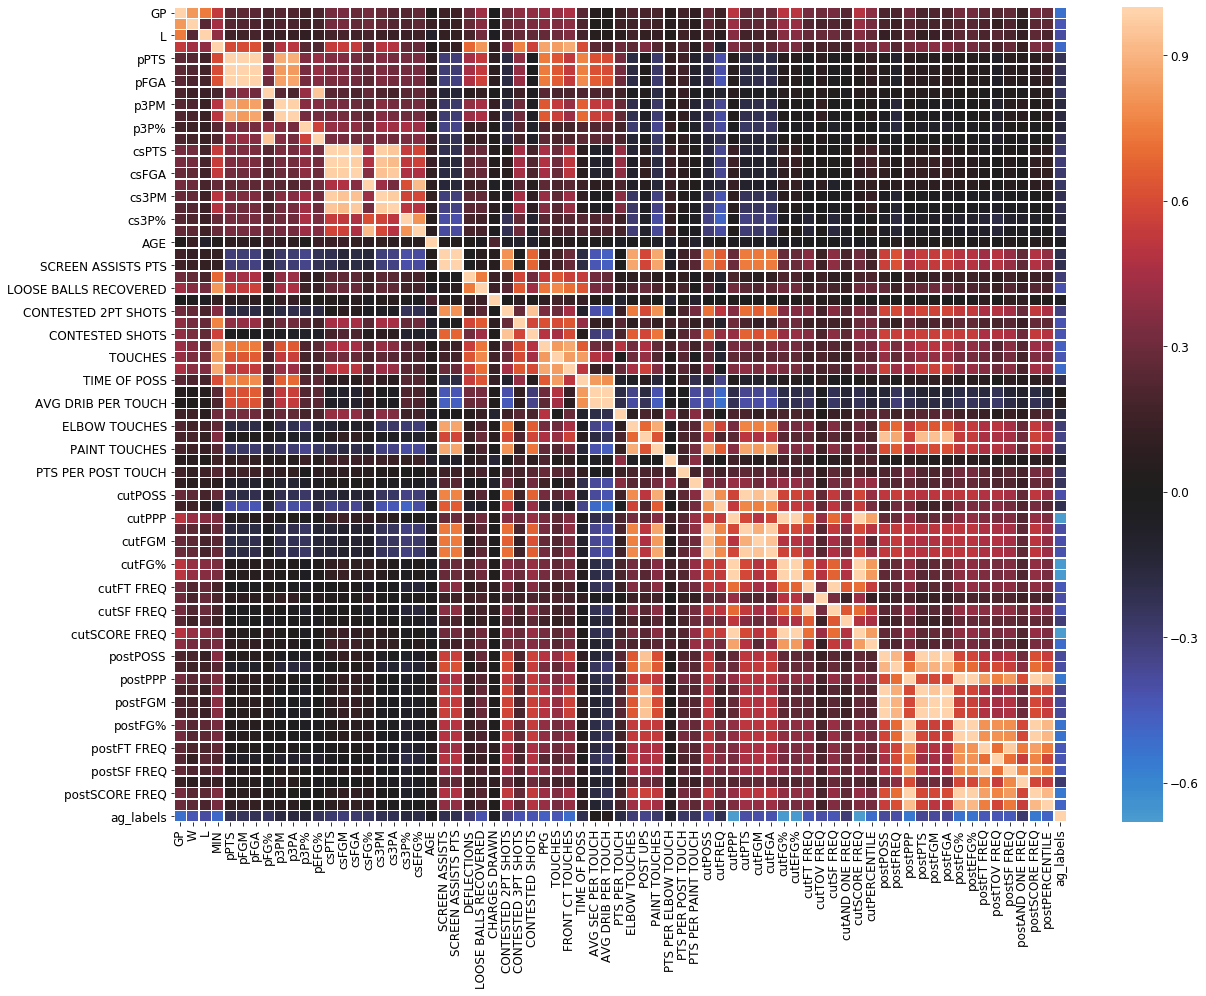

In [568]:
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
sns.heatmap(corr, linewidths=.5, ax=ax,center = False)

In [809]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 485
Data columns (total 76 columns):
PLAYER                         486 non-null object
TEAM                           486 non-null object
GP                             486 non-null int64
W                              486 non-null int64
L                              486 non-null int64
MIN                            486 non-null float64
pPTS                           486 non-null float64
pFGM                           486 non-null float64
pFGA                           486 non-null float64
pFG%                           486 non-null float64
p3PM                           486 non-null float64
p3PA                           486 non-null float64
p3P%                           486 non-null float64
pEFG%                          486 non-null float64
csPTS                          486 non-null float64
csFGM                          486 non-null float64
csFGA                          486 non-null float64
csFG%              

In [86]:
df_18 = df_18.drop(['W','L','OFF LOOSE BALLS RECOVERED','DEF LOOSE BALLS RECOVERED',
                     '% LOOSE BALLS RECOVERED OFF','% LOOSE BALLS RECOVERED DEF','csFGM',
                   'pFGM','cs3PM','p3PM','SCREEN ASSISTS PTS','CONTESTED SHOTS','cutFREQ','postFREQ',
                   'cutPPP','postFREQ','cutPPP','postPPP','cutFGM','postFGM','cutEFG%','postEFG%',
                   'cutPERCENTILE','postPERCENTILE'], axis=1)

In [569]:
print(df_18.loc[new_df['TEAM']=='BKN']['p3PA'].mean())
print(df_18.loc[new_df['TEAM']=='GSW']['p3PA'].mean())
df_16['TEAM'].unique()
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_18['TEAM'].unique()),df_18.groupby('TEAM').mean()['cutPTS'],ax=ax)
#df_16.groupby('TEAM').mean()['cutPTS']


NameError: name 'new_df' is not defined

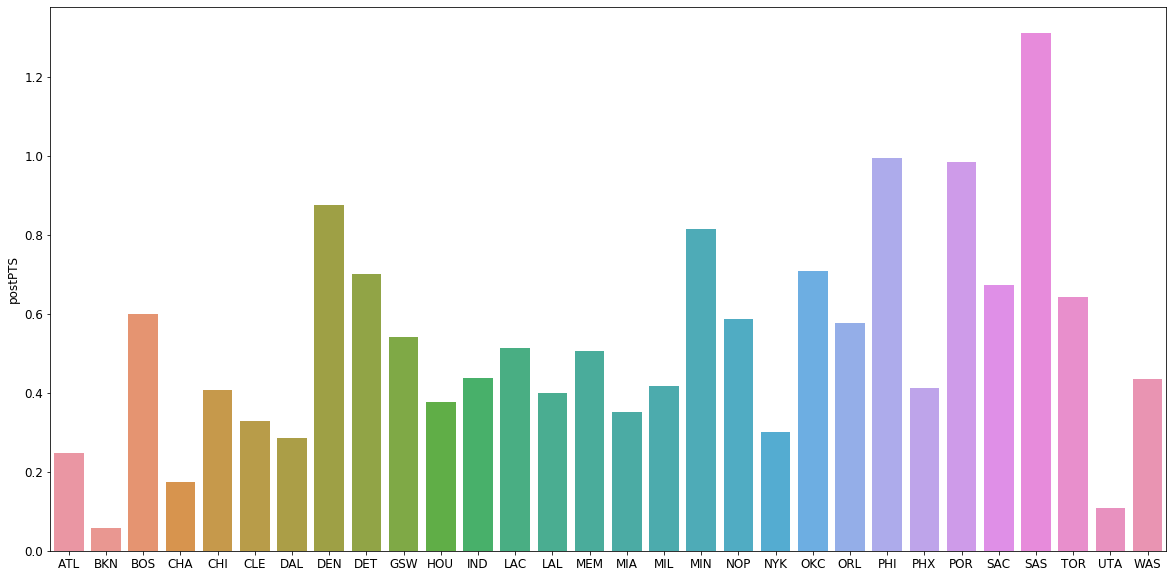

In [570]:
#post points by team
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_18['TEAM'].unique()),df_18.groupby('TEAM').mean()['postPTS'],ax=ax)

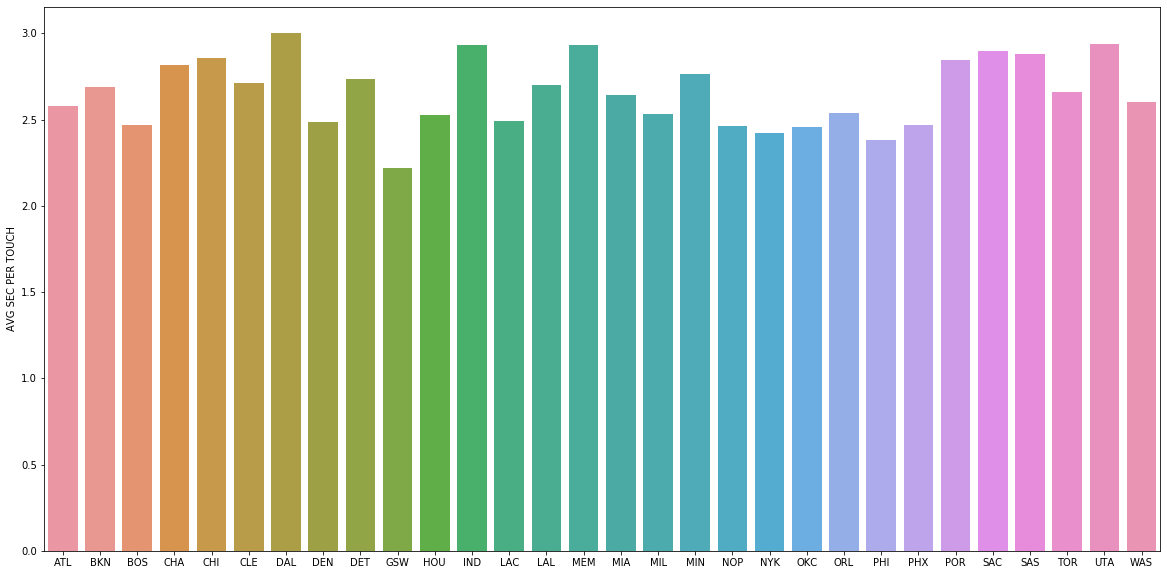

In [89]:
# seconds per touch by team
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_18['TEAM'].unique()),df_18.groupby('TEAM').mean()['AVG SEC PER TOUCH'],ax=ax)

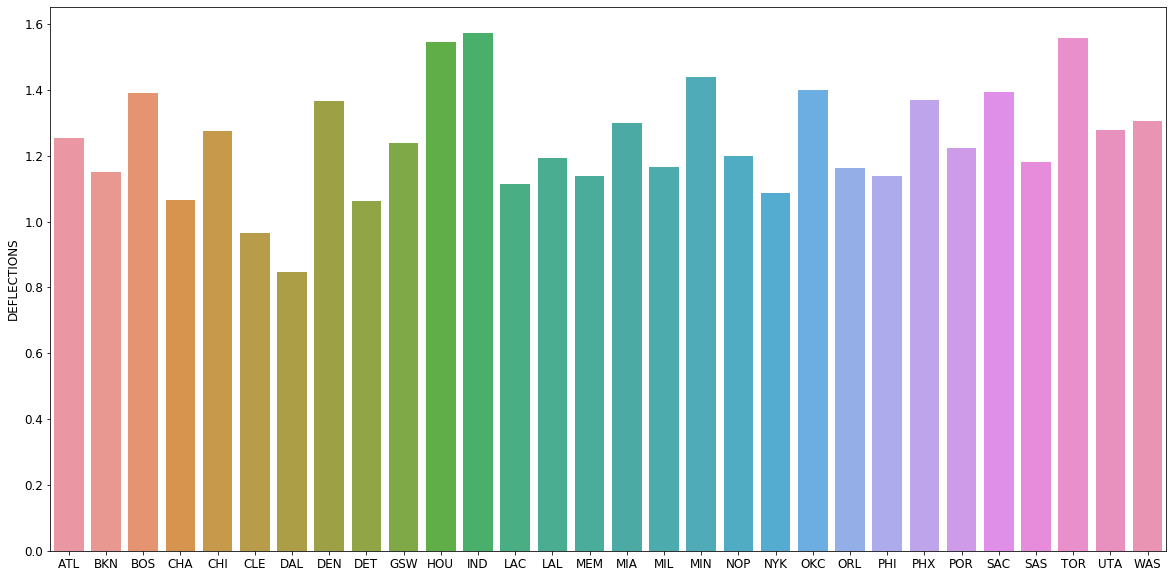

In [571]:
#deflections by team
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_18['TEAM'].unique()),df_18.groupby('TEAM').mean()['DEFLECTIONS'],ax=ax)

In [92]:
print(df_16.loc[new_df['TEAM']=='BKN']['csFG%'].mean())
print(df_16.loc[new_df['TEAM']=='GSW']['csFG%'].mean())
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_16['TEAM'].unique()),df_16.groupby('TEAM').mean()['csFG%'],ax=ax)

NameError: name 'new_df' is not defined

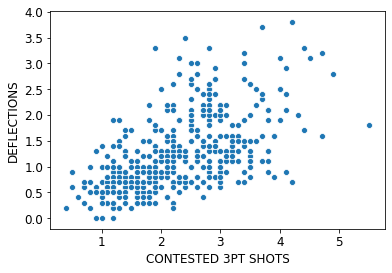

In [572]:
sns.scatterplot(df_18['CONTESTED 3PT SHOTS'],df_18['DEFLECTIONS'])


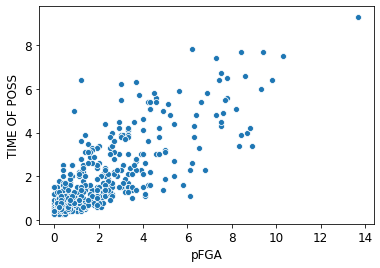

In [573]:
sns.scatterplot(df_18['pFGA'],df_18['TIME OF POSS'])

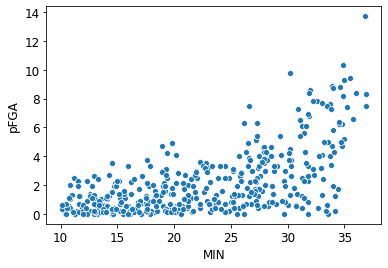

In [574]:
ax = sns.scatterplot(df_18['MIN'],df_18['pFGA'])
ax

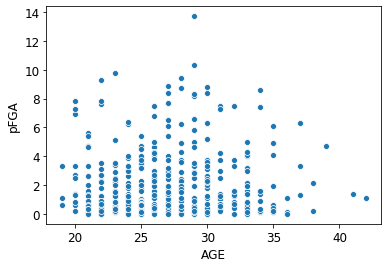

In [575]:
sns.scatterplot(df_18['AGE'],df_18['pFGA'])

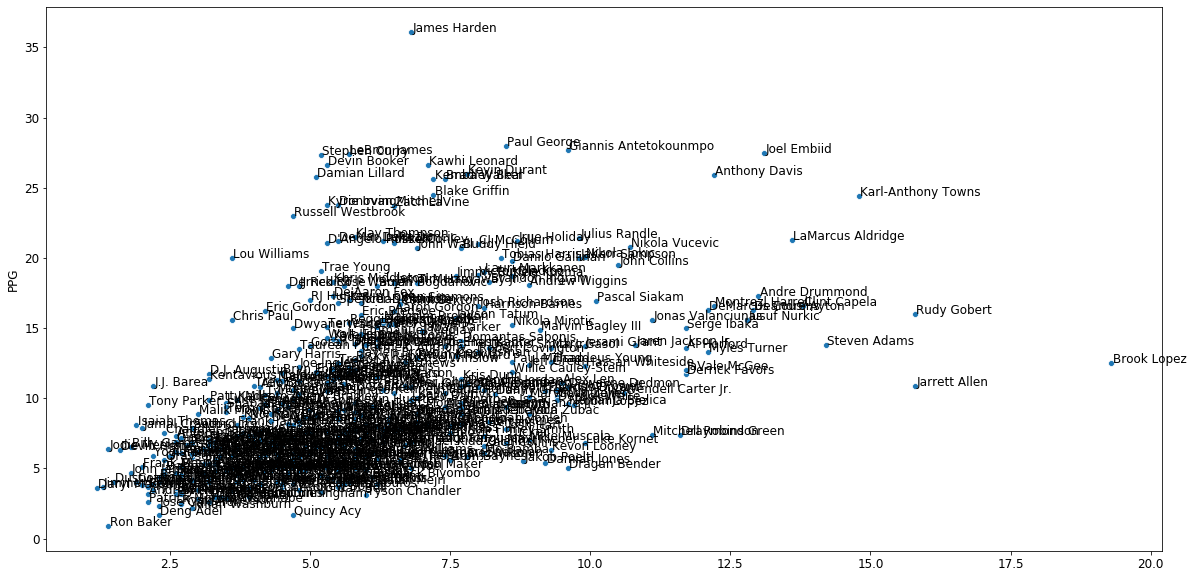

In [576]:
fig, ax = plt.subplots(figsize=(20,10)) 
ax = sns.scatterplot(df_18['CONTESTED 3PT SHOTS']+df_18['CONTESTED 2PT SHOTS'],df_18['PPG'])
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_18['CONTESTED 3PT SHOTS']+df_18['CONTESTED 2PT SHOTS'], df_18['PPG'], df_18['PLAYER'], plt.gca()) 

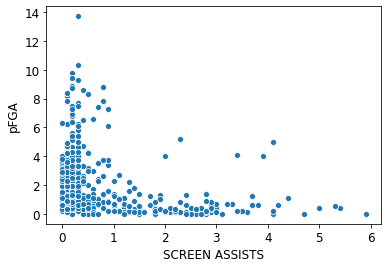

In [577]:
sns.scatterplot(df_18['SCREEN ASSISTS'],df_18['pFGA'])

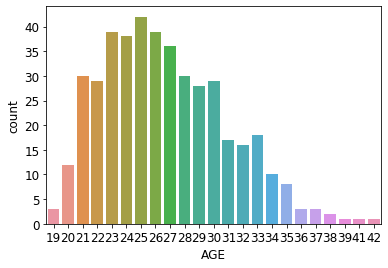

In [581]:
sns.countplot(df_18['AGE'])

AGE
19    2.666667
20    2.000000
21    1.973333
22    2.003448
23    2.184615
24    1.913158
25    2.166667
26    2.346154
27    2.675000
28    3.033333
29    2.775000
30    2.379310
31    2.605882
32    2.506250
33    2.794444
34    2.230000
35    2.275000
36    1.000000
37    1.033333
38    2.650000
39    1.400000
41    5.400000
42    3.500000
Name: csFGA, dtype: float64

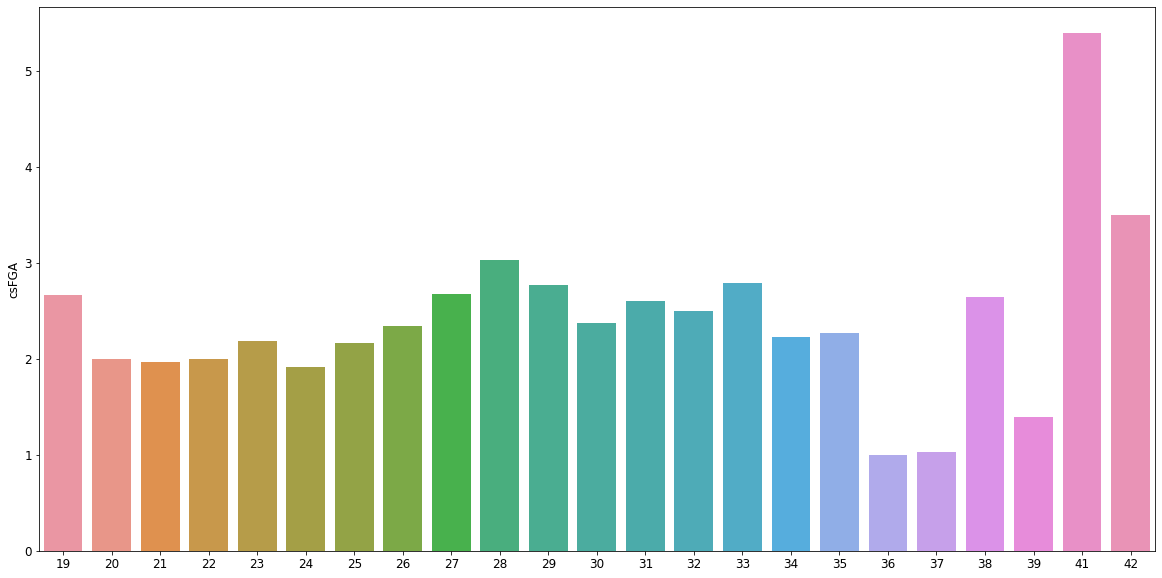

In [582]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_18['AGE'].unique()),df_18.groupby('AGE').mean()['csFGA'],ax=ax)
df_18.groupby('AGE').mean()['csFGA']

AGE
19    2.666667
20    2.000000
21    1.973333
22    2.003448
23    2.184615
24    1.913158
25    2.166667
26    2.346154
27    2.675000
28    3.033333
29    2.775000
30    2.379310
31    2.605882
32    2.506250
33    2.794444
34    2.230000
35    2.275000
36    1.000000
37    1.033333
38    2.650000
39    1.400000
41    5.400000
42    3.500000
Name: csFGA, dtype: float64

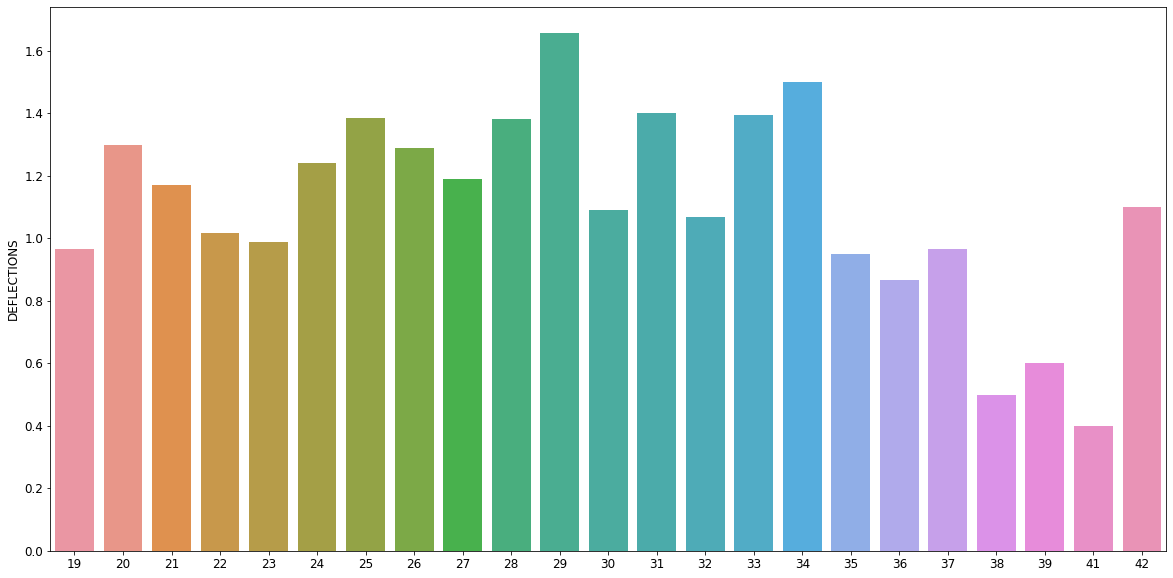

In [583]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_18['AGE'].unique()),df_18.groupby('AGE').mean()['DEFLECTIONS'],ax=ax)
df_18.groupby('AGE').mean()['csFGA']

In [539]:
#save datasets
export_nba18 = df_18.to_csv('nba18_advanced')
#export_nba18_standard = df_standard18.to_csv('nba18_standard')

## Clustering

In [533]:
df_18 = df_18.loc[df_18['MIN']>10] #only include players who average more than 10 minutes per game

x18 = df_18[['GP', 'MIN', 'pPTS', 'pFGA', 'pFG%', 'p3PA', 'p3P%',
       'pEFG%', 'csPTS', 'csFGA', 'csFG%', 'cs3PA', 'cs3P%', 'csEFG%', 'AGE',
       'SCREEN ASSISTS', 'DEFLECTIONS', 'LOOSE BALLS RECOVERED',
       'CHARGES DRAWN', 'CONTESTED 2PT SHOTS', 'CONTESTED 3PT SHOTS', 'PPG',
       'TOUCHES', 'FRONT CT TOUCHES', 'TIME OF POSS', 'AVG SEC PER TOUCH',
       'AVG DRIB PER TOUCH', 'PTS PER TOUCH', 'ELBOW TOUCHES', 'POST UPS',
       'PAINT TOUCHES', 'PTS PER ELBOW TOUCH', 'PTS PER POST TOUCH',
       'PTS PER PAINT TOUCH', 'cutPOSS', 'cutPTS', 'cutFGA', 'cutFG%',
       'cutFT FREQ', 'cutTOV FREQ', 'cutSF FREQ', 'cutAND ONE FREQ',
       'cutSCORE FREQ', 'postPOSS', 'postPTS', 'postFGA', 'postFG%',
       'postFT FREQ', 'postTOV FREQ', 'postSF FREQ', 'postAND ONE FREQ',
       'postSCORE FREQ']]



kmeans_model = KMeans(n_clusters=9, random_state=1)
kmeans_model.fit(x18)

group0_18 = []
group1_18 = []
group2_18 = []
group3_18 = []
group4_18 = []
group5_18 = []
group6_18 = []
group7_18 = []
group8_18 = []

for player in df_18['PLAYER']:
    player_stats = x18.loc[df_18['PLAYER'] == player,: ]
    player_stats_list = player_stats.values.tolist()
    player_cluster_label = kmeans_model.predict(player_stats_list)
    label = list(player_cluster_label)
   
    if label == [0]:
        group0_18.append(player)
    if label == [1]:
        group1_18.append(player)
    if label == [2]:
        group2_18.append(player)
    if label == [3]:
        group3_18.append(player)
    if label == [4]:
        group4_18.append(player)
    if label == [5]:
        group5_18.append(player)
    if label == [6]:
        group6_18.append(player)
    if label == [7]:
        group7_18.append(player)
    if label == [8]:
        group8_18.append(player)
    
group_list18 = [group0_18,group1_18,group2_18,group3_18,group4_18,group5_18,group6_18,group7_18,group8_18]
df_18['cluster'] = kmeans_model.labels_ 

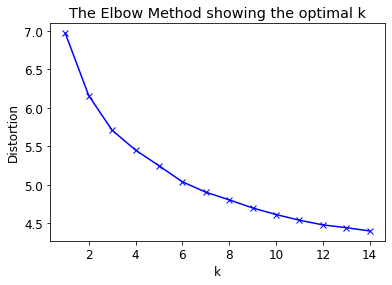

In [587]:
# Elbow plot
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [139]:
driver.get('https://stats.nba.com/players/traditional/?sort=PTS&dir=-1&Season=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
standard_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by ::row.$hash"]')

stats_list_standard18 = []
for i in range(530):
    stats_list_standard18.append(standard_stats18[i].text)
stats_list_standard18[0]

def clean_standard_data(stats_list):
    cleaned = []
    for i in stats_list:
        x = i.split('\n')[1:]
        y = x[1].split(" ")
        empty = [x[0]]
        for j in range(len(y)):
            empty.append(y[j])
        cleaned.append(empty)
    return cleaned


standard_18 = clean_standard_data(stats_list_standard18)

columns_standard = driver.find_elements_by_tag_name('th')
cols_standard = []
for i in range(len(columns_standard)):
    cols_standard.append(columns_standard[i].text)


cols_standard[1:30]
df_standard18 = make_df(cols_standard[1:30],standard_18)
df_standard18.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,James Harden,HOU,29,78,51,27,36.8,36.1,10.8,24.5,...,6.6,7.5,5.0,2.0,0.7,3.1,58.7,34,7,4.6
1,Paul George,OKC,29,77,46,31,36.9,28.0,9.2,21.0,...,8.2,4.1,2.7,2.2,0.4,2.8,49.3,24,1,6.4
2,Giannis Antetokounmpo,MIL,24,72,56,16,32.8,27.7,10.0,17.3,...,12.5,5.9,3.7,1.3,1.5,3.2,56.2,54,5,9.1
3,Joel Embiid,PHI,25,64,43,21,33.7,27.5,9.1,18.7,...,13.6,3.7,3.5,0.7,1.9,3.3,53.7,58,2,5.8
4,LeBron James,LAL,34,55,28,27,35.2,27.4,10.1,19.9,...,8.5,8.3,3.6,1.3,0.6,1.7,52.0,32,8,2.1


In [292]:

df_standard18 = clean_df(df_standard18)
df_standard18[df_standard18['PLAYER'].isin(group0_18)]['PTS'].mean()
five_stats = ['PTS','AST','REB','STL','BLK']

KeyError: 'csFG%'

### Cluster Analysis

In [312]:
pts_list = []
for group in group_list18:
    pts_list.append(df_standard18[df_standard18['PLAYER'].isin(group)]['PTS'].mean())

ast_list = []
for group in group_list18:
    ast_list.append(df_standard18[df_standard18['PLAYER'].isin(group)]['AST'].mean())
    
reb_list = []
for group in group_list18:
    reb_list.append(df_standard18[df_standard18['PLAYER'].isin(group)]['REB'].mean())

stl_list = []
for group in group_list18:
    stl_list.append(df_standard18[df_standard18['PLAYER'].isin(group)]['STL'].mean())
    
blk_list = []
for group in group_list18:
    blk_list.append(df_standard18[df_standard18['PLAYER'].isin(group)]['BLK'].mean())

made3_list = []
for group in group_list18:
    made3_list.append(df_standard18[df_standard18['PLAYER'].isin(group)]['3PM'].mean())

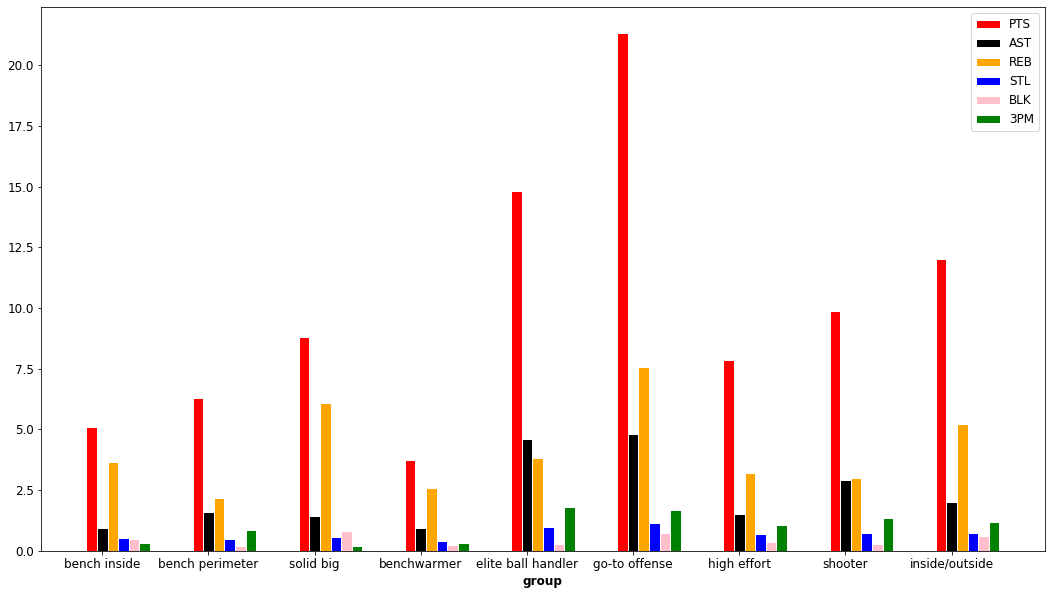

In [584]:
barWidth = 0.1
 
# set height of bar
bars_pts = pts_list
bars_ast = ast_list
bars_reb = reb_list
bars_stl = stl_list
bars_blk = blk_list
bars_3pt = made3_list
# Set position of bar on X axis
r1 = np.arange(len(bars_pts))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
# Make the plot
fig = plt.figure(figsize=(18,10))
plt.bar(r1, bars_pts, color='red', width=barWidth, edgecolor='white', label='PTS')
plt.bar(r2, bars_ast, color='black', width=barWidth, edgecolor='white', label='AST')
plt.bar(r3, bars_reb, color='orange', width=barWidth, edgecolor='white', label='REB')
plt.bar(r4, bars_stl, color='blue', width=barWidth, edgecolor='white', label='STL')
plt.bar(r5, bars_blk, color='pink', width=barWidth, edgecolor='white', label='BLK')
plt.bar(r6, bars_3pt, color='green', width=barWidth, edgecolor='white', label='3PM')
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars_pts))], ['bench inside', 'bench perimeter', 'solid big', 
                                                          'benchwarmer', 'elite ball handler',
                                                          'go-to offense','high effort','shooter',
                                                          'inside/outside'])

 
# Create legend & Show graphic

plt.legend()
plt.show()


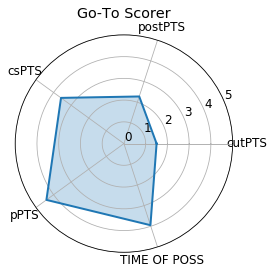

In [586]:
#radar plots
labels = ['cutPTS','postPTS','csPTS','pPTS','TIME OF POSS']
markers = [0,1,2,3,4,5]
str_markers = ['0','1','2','3','4','5']

def make_radar_chart(name, stats, attribute_labels = labels, plot_markers = markers, plot_str_markers = str_markers):

    labels = np.array(attribute_labels)

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    
    plt.rcParams.update({'font.size':12})
    fig= plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.yticks(markers)
    ax.set_title(name)
    ax.grid(True)  

    return plt.show()

go_to_stats = []
for i in labels:
    go_to_stats.append(df_18.loc[df_18['cluster']=='go-to scorer'][i].mean())

solid_big_stats = []
for i in labels:
    solid_big_stats.append(df_18.loc[df_18['cluster']=='solid big'][i].mean())
    
elite_ballhandler_stats = []
for i in labels:
    elite_ballhandler_stats.append(df_18.loc[df_18['cluster']=='elite ballhandler'][i].mean())

make_radar_chart("Go-To Scorer",go_to_stats)

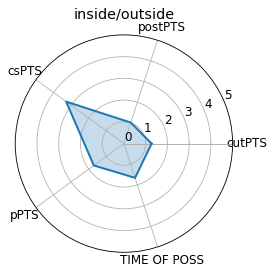

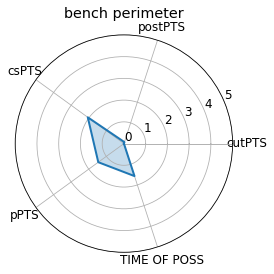

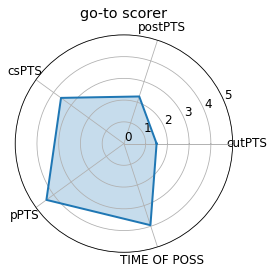

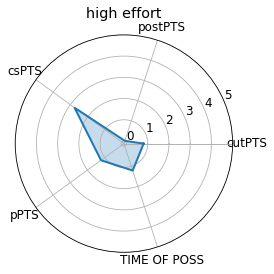

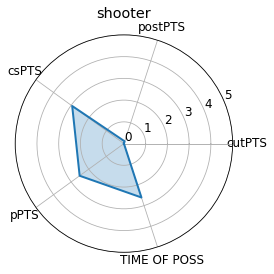

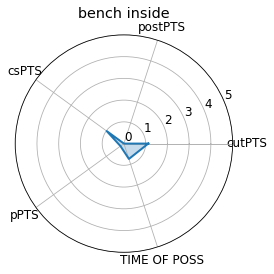

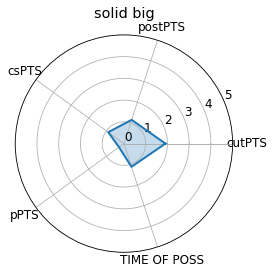

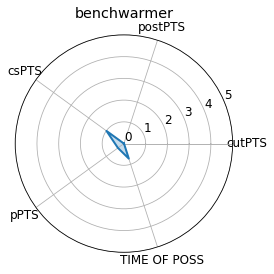

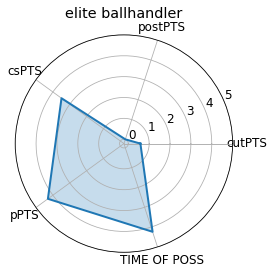

In [541]:
clusters = list(df_18.cluster.unique())
for cluster in clusters:
    stats_list = []
    for label in labels:
        stats_list.append(df_18.loc[df_18['cluster']==cluster][label].mean())
    make_radar_chart(cluster,stats_list)
    print('\n')

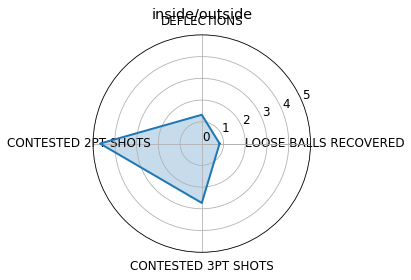

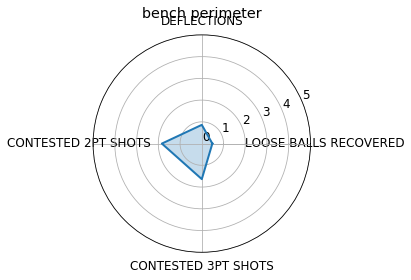

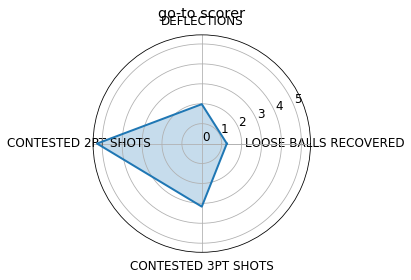

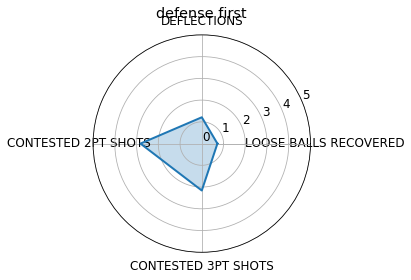

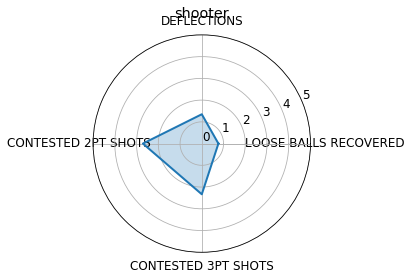

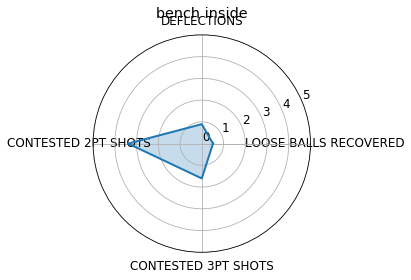

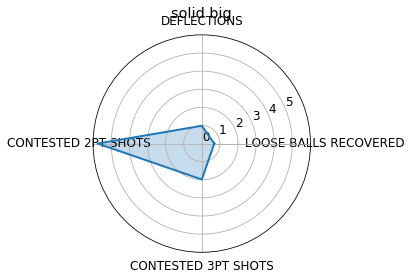

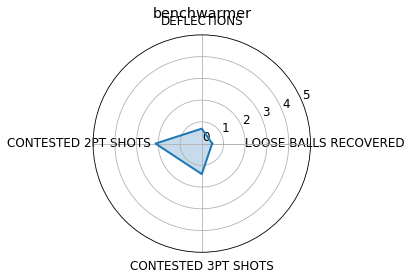

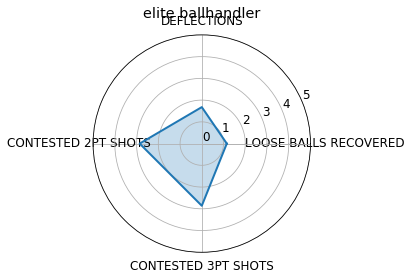

In [523]:
labels_def = ['LOOSE BALLS RECOVERED','DEFLECTIONS','CONTESTED 2PT SHOTS','CONTESTED 3PT SHOTS']
markers = [0,1,2,3,4,5]
str_markers = ['0','1','2','3','4','5']

for cluster in clusters:
    stats_list = []
    for label in labels_def:
        stats_list.append(df_18.loc[df_18['cluster']==cluster][label].mean())
    make_radar_chart(cluster,stats_list,labels_def)
    print('\n')

In [318]:
for group in group_list18:
    print(df_18[df_18['PLAYER'].isin(group)]['pEFG%'].mean())

13.234615384615388
42.99591836734693
28.071698113207542
15.42
45.35249999999999
42.04324324324324
43.26774193548387
41.61702127659574
41.375384615384604


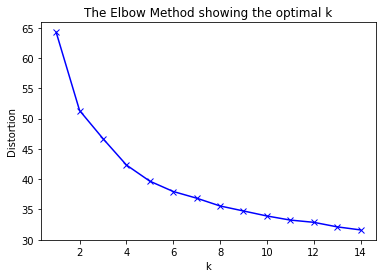

In [179]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 


In [548]:
for i in group_list18:
    print(i)
    print('\n')


['Alex Poythress', 'Andrew Bogut', 'Chandler Hutchison', 'Corey Brewer', 'Damian Jones', 'Dante Cunningham', "De'Anthony Melton", 'Derrick Jones Jr.', 'Devin Robinson', 'Donte DiVincenzo', 'Ed Davis', 'Frank Mason', 'Hamidou Diallo', 'Ian Mahinmi', 'Jaron Blossomgame', 'Jarrett Allen', 'Johnathan Williams', 'Jonah Bolden', 'Keita Bates-Diop', 'Khem Birch', 'Omari Spellman', 'Omri Casspi', 'Ray Spalding', 'Semi Ojeleye', 'Timothe Luwawu-Cabarrot', 'Tyson Chandler']


['Aaron Holiday', 'Abdel Nader', 'Alex Abrines', 'Brandon Knight', 'Brandon Sampson', 'CJ Miles', 'Cameron Payne', 'Cameron Reynolds', 'Carmelo Anthony', 'Chandler Parsons', 'Courtney Lee', 'Damion Lee', 'Dante Exum', 'Danuel House Jr.', 'Daryl Macon', "Devonte' Graham", 'Duncan Robinson', 'Dwayne Bacon', 'Frank Ntilikina', 'Gary Clark', 'Grayson Allen', 'Henry Ellenson', 'Isaiah Briscoe', 'Isaiah Canaan', 'Isaiah Thomas', 'JR Smith', 'JaKarr Sampson', 'Jaylen Adams', 'Jerryd Bayless', 'Jevon Carter', 'Jodie Meeks', 'John J

In [534]:
bench_inside = group0_18
bench_perimeter = group1_18
solid_big = group2_18
benchwarmer = group3_18
elite_ballhandler = group4_18
go_to_scorer = group5_18
defense_first = group6_18
shooter = group7_18
inside_outside = group8_18
#change cluster label names
df_18['cluster'] = df_18['cluster'].map({0:'bench inside', 1:'bench perimeter', 2:'solid big', 3:'benchwarmer',
                                        4:'elite ballhandler', 5:'go-to scorer', 6:'high effort', 7:'shooter',
                                        8:'inside/outside'})


In [419]:
def get_cluster(player):
    return df_18.loc[df_18['PLAYER']==player]['cluster']

get_cluster("Buddy Hield")

54    elite ballhandler
Name: cluster, dtype: object

In [423]:
df_18.loc[df_18['TEAM']=='GSW'][['PLAYER','cluster']]
#for i in df_18.loc[df_18['TEAM']=='GSW']:
    #print(i)

,PLAYER,cluster
11,Alfonzo McKinnie,defense first
18,Andre Iguodala,defense first
20,Andrew Bogut,bench inside
86,Damian Jones,bench inside
88,Damion Lee,bench perimeter
109,DeMarcus Cousins,inside/outside
140,Draymond Green,go-to scorer
268,Jonas Jerebko,inside/outside
272,Jordan Bell,solid big
304,Kevin Durant,go-to scorer


(<matplotlib.axes._subplots.AxesSubplot at 0x1a2b17dcf8>,
             PLAYER            cluster
 93     Danny Green     inside/outside
 168  Fred VanVleet  elite ballhandler
 246     Jeremy Lin            shooter
 254    Jodie Meeks    bench perimeter
 295  Kawhi Leonard       go-to scorer
 320     Kyle Lowry  elite ballhandler
 346     Marc Gasol       go-to scorer
 392  Norman Powell        high effort
 393     OG Anunoby          solid big
 400  Pascal Siakam       go-to scorer
 403  Patrick McCaw        benchwarmer
 441    Serge Ibaka     inside/outside)

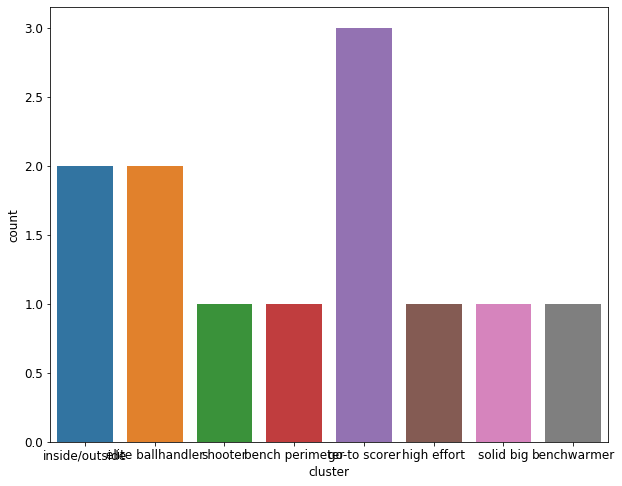

In [538]:


def get_team_build(team):
    fig = plt.figure(figsize=(10,8))
    barplot = sns.countplot(df_18.loc[df_18['TEAM']==team]['cluster'])
    players = df_18.loc[df_18['TEAM']==team][['PLAYER','cluster']]
    return barplot, players

get_team_build('TOR')

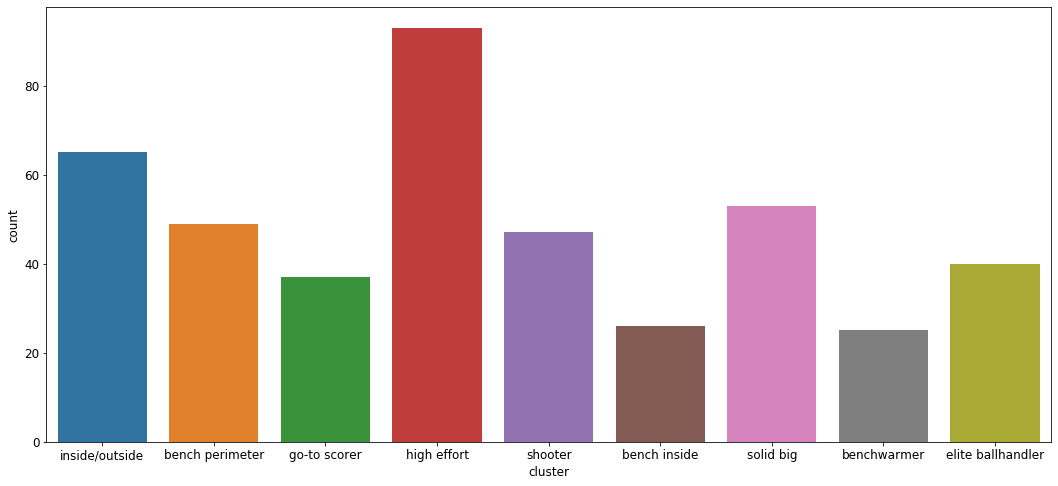

In [547]:
fig = plt.figure(figsize=(18,8))
sns.countplot(df_18['cluster'])

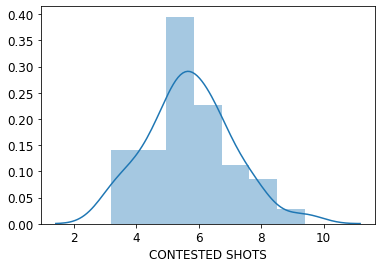

In [514]:
sns.distplot(df_18.loc[df_18['cluster']=='elite ballhandler']['CONTESTED SHOTS'])

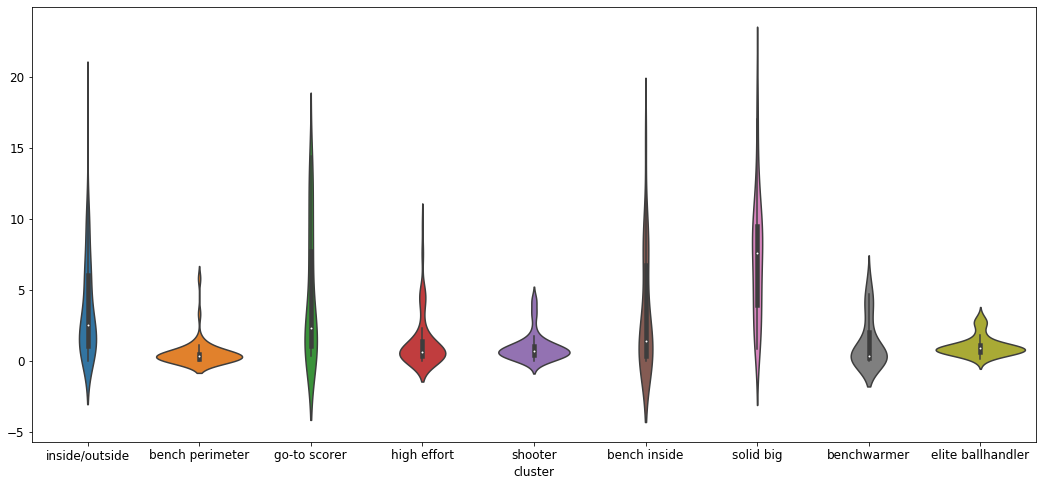

In [546]:
fig = plt.figure(figsize=(18,8))
sns.violinplot(df_18['cluster'],(df_18['SCREEN ASSISTS']+df_18['SCREEN ASSISTS PTS']))



In [543]:
len(x18.columns)

52